In [3]:
import draw
import matplotlib.pyplot as plt
import numpy as np

In [4]:
DISTANCE_THRESHOLD = 4

In [5]:
off_team = [(5.327102803738318, 39.71014492753623), (9.25233644859813, 28.115942028985504), (10.74766355140187, 72.89855072463767), (23.364485981308412, 98.55072463768116), (26.16822429906542, 1.4492753623188406), (20.46728971962617, 49.565217391304344), (32.61682242990654, 27.97101449275362), (32.33644859813084, 70.43478260869564), (48.69158878504673, 97.82608695652173), (48.504672897196265, 51.01449275362319), (48.504672897196265, 3.043478260869565)]
def_team = [(28.224299065420563, 86.23188405797102), (29.813084112149536, 69.85507246376811), (31.121495327102807, 48.69565217391304), (31.77570093457944, 17.97101449275362), (30.560747663551403, 31.884057971014492), (37.94392523364486, 63.188405797101446), (22.71028037383178, 55.362318840579704)]

In [6]:
def draw_team(team_players, team=1):
    if team == 1:
        for coordinates in team_players:
            plt.scatter(coordinates[0], coordinates[1], s=100, color='navy', edgecolors='navy', alpha=0.7, linewidths=1,  zorder=100)
    if team == 2:
        for coordinates in team_players:
            plt.scatter(coordinates[0], coordinates[1], s=100, color='firebrick', edgecolors='firebrick', alpha=0.7, linewidth=1, zorder=100)

In [7]:
def draw_edges(team_players, draw_all=False, from_player=None):
    if draw_all:
        for coordinates in team_players:
            for target in team_players:
                if target != coordinates:
                    plt.plot([coordinates[0], target[0]], [coordinates[1], target[1]], color = 'C1')
    if from_player is not None:
        for target in team_players:
            if target != from_player:
                plt.plot([from_player[0], target[0]], [from_player[1], target[1]], color = 'palegreen')

In [8]:
def distance(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

In [9]:
def calculate_blocked_lines(off_team, def_team, from_player):
    lines_blocked = []
    for off_player in off_team:

        if off_player == from_player:
            continue

        for def_player in def_team:
            a, c = linear_equation_from_2_points(from_player, off_player)
            x, y = projection_on_line(def_player, a, c, b=-1)

            if (from_player[0] < x < off_player[0]) or (off_player[0] < x < from_player[0]):
                if distance_to_line(def_player, from_player, off_player) < DISTANCE_THRESHOLD:
                    lines_blocked.append([from_player, off_player])
                    break

    return lines_blocked

In [10]:
def distance_to_line(p0, p1, p2):
    return abs((p2[0]-p1[0])*(p1[1]-p0[1]) - (p1[0]-p0[0])*(p2[1]-p1[1]))/distance(p2,p1)

In [11]:
def projection_on_line(p, a, c, b=-1):
    x = (b * (b*p[0] - a*p[1]) - a * c) / (a * a + b * b)
    y = (a * (-b*p[0] + a*p[1]) - b * c) / (a * a + b * b)

    return x, y

In [12]:
def linear_equation_from_2_points(p0, p1):
    m = (p1[1] - p0[1]) / (p1[0] - p0[0])
    b = p0[1] - m*p0[0]

    return m, b

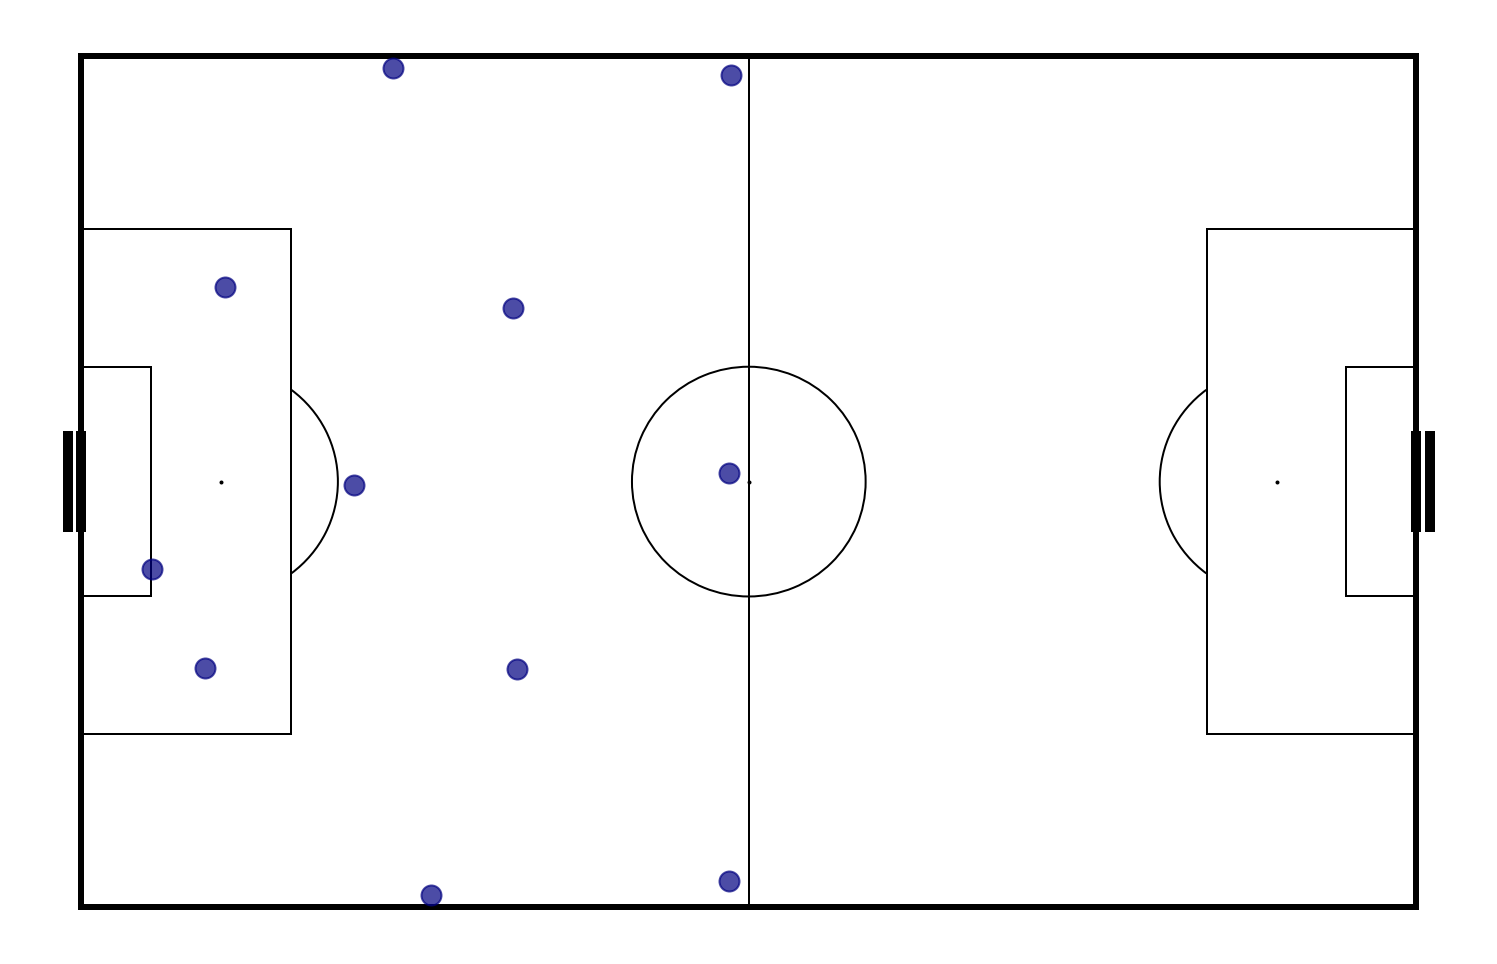

In [13]:
draw.pitch()
draw_team(off_team)
#draw_edges(off_team, from_player=off_team[0])

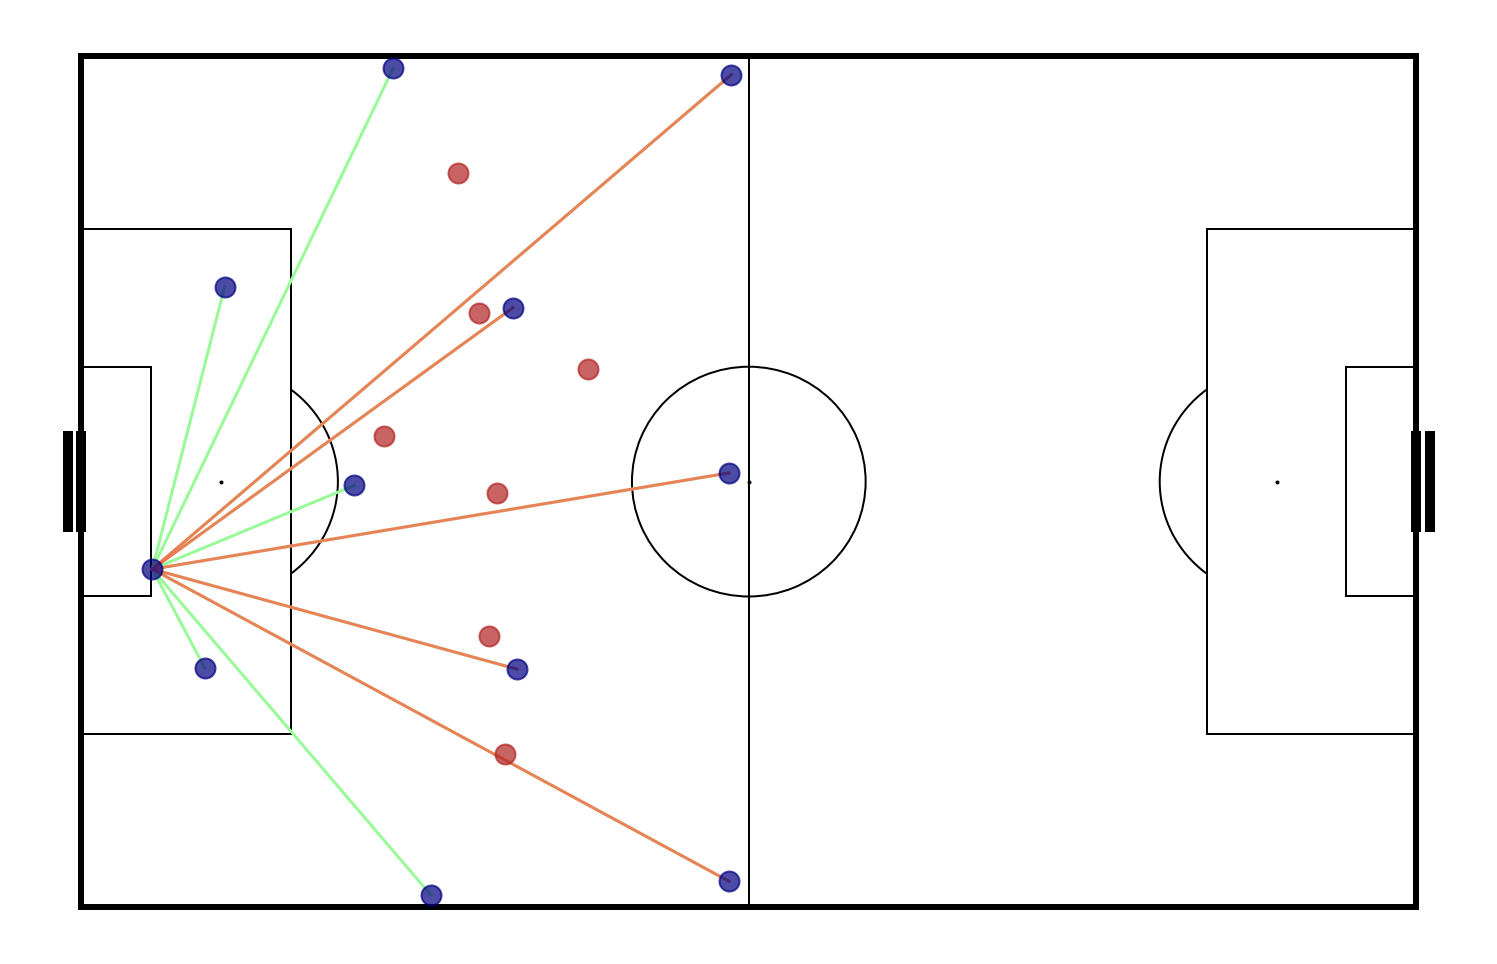

In [14]:
draw.pitch()
draw_team(off_team)
draw_team(def_team, team=2)
draw_edges(off_team, from_player=off_team[0])
blocked_lines = calculate_blocked_lines(off_team, def_team, off_team[0])
for blocked_line in blocked_lines:
    plt.plot([blocked_line[0][0], blocked_line[1][0]], [blocked_line[0][1], blocked_line[1][1]], color='tomato', alpha = 0.8)